# FlowDenoising User Manual

FlowDenoising is a low-pass filtering tool for volumetric data. A 1D Gaussian filter is applied to each dimension Z, Y and X (in this order), resulting in a 3D filtering. Unlike classical Gaussian filtering, the 2D slices (in each dimension) are aligned to minimize the smoothing of the structures recognized by the Optical Flow (OF) estimator.

## 1. Installing the required packages

In [1]:
!pip install -r ../requirements.txt

In [2]:
# Delete temporal files
#!rm -f *.mrc *.tif

## 2. Denoising using the default parameters

The default parameters are:

In [3]:
!python ../flowdenoising.py -h

usage: flowdenoising.py [-h] [-i INPUT] [-o OUTPUT] [-s SIGMA [SIGMA ...]]
                        [-l LEVELS] [-w WINSIDE] [-v VERBOSITY] [-n] [-m]

3D Gaussian filtering controlled by the optical flow.

options:
  -h, --help            show this help message and exit
  -i INPUT, --input INPUT
                        Input a MRC-file or a multi-image TIFF-file (default:
                        ./volume.mrc)
  -o OUTPUT, --output OUTPUT
                        Output a MRC-file or a multi-image TIFF-file (default:
                        ./denoised_volume.mrc)
  -s SIGMA [SIGMA ...], --sigma SIGMA [SIGMA ...]
                        Gaussian sigma for each dimension in the order (Z, Y,
                        X) (default: (2.0, 2.0, 2.0))
  -l LEVELS, --levels LEVELS
                        Number of levels of the Gaussian pyramid used by the
                        optical flow estimator (default: 0)
  -w WINSIDE, --winside WINSIDE
                        Side of the window used by th

### Download a (small) volume
This example uses a 32x256x256 (Z, Y, X) crop of the [EMPIAR-10311](https://www.ebi.ac.uk/empiar/EMPIAR-10310/) volume.

In [4]:
%%bash
OUTPUT_FILENAME="small_vol.mrc"
if test ! -f $OUTPUT_FILENAME ; then
    FILEID="1jYL6FEMeWGXO0KYlCb9udrICc2qaZLHB"
    wget --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O $OUTPUT_FILENAME 2> /dev/null
fi

In [5]:
!ls -l *.mrc

-rw-r--r-- 1 vruiz vruiz 419431424 Feb 15 17:39 big_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 Feb 15 17:38 denoised_small_vol_l0.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 Feb 15 17:38 denoised_small_vol_l3.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 Feb 15 17:38 denoised_small_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 Feb 15 17:38 denoised_small_vol_w17.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 Feb 15 17:38 denoised_small_vol_w3.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 Feb 15 17:38 denoised_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 Feb 15 17:39 small_vol.mrc


### Filter (using [MRC](https://en.wikipedia.org/wiki/MRC_(file_format)) files)

In [6]:
%%time
!python ../flowdenoising_6.py -i small_vol.mrc -o denoised_vol.mrc -v 1

[2023-02-15 17:40:43,605] (INFO) Verbosity level = 1
[2023-02-15 17:40:43,605] (INFO) Number of processing units: 20
[2023-02-15 17:40:43,606] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-02-15 17:40:43,606] (INFO) reading "small_vol.mrc"
[2023-02-15 17:40:43,608] (INFO) shape of the input volume (Z, Y, X) = (32, 256, 256)
[2023-02-15 17:40:43,608] (INFO) type of the volume = float32
[2023-02-15 17:40:43,608] (INFO) vol requires 8.0 MB
[2023-02-15 17:40:43,608] (INFO) small_vol.mrc max = 255.0
[2023-02-15 17:40:43,609] (INFO) small_vol.mrc min = 0.0
[2023-02-15 17:40:43,609] (INFO) Input vol average = 163.53050231933594
[2023-02-15 17:40:43,609] (INFO) read "small_vol.mrc" in 0.003391842999999728 seconds
[2023-02-15 17:40:43,609] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 17:40:43,609] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 17:40:43,609] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 17:40:43,610] (INFO) length of each filter (Z, Y, X) = [17, 17

In [7]:
!ls -l *.mrc

-rw-r--r-- 1 vruiz vruiz 419431424 Feb 15 17:39 big_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 Feb 15 17:38 denoised_small_vol_l0.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 Feb 15 17:38 denoised_small_vol_l3.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 Feb 15 17:38 denoised_small_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 Feb 15 17:38 denoised_small_vol_w17.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 Feb 15 17:38 denoised_small_vol_w3.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 Feb 15 17:40 denoised_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 Feb 15 17:39 small_vol.mrc


### Filter (using multi-page [TIFF](https://en.wikipedia.org/wiki/TIFF) files)

In [8]:
%%time
!python ../flowdenoising_6.py -i small_vol.mrc -o denoised_vol.tif -v 1

[2023-02-15 17:40:45,764] (INFO) Verbosity level = 1
[2023-02-15 17:40:45,764] (INFO) Number of processing units: 20
[2023-02-15 17:40:45,764] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-02-15 17:40:45,764] (INFO) reading "small_vol.mrc"
[2023-02-15 17:40:45,767] (INFO) shape of the input volume (Z, Y, X) = (32, 256, 256)
[2023-02-15 17:40:45,767] (INFO) type of the volume = float32
[2023-02-15 17:40:45,767] (INFO) vol requires 8.0 MB
[2023-02-15 17:40:45,767] (INFO) small_vol.mrc max = 255.0
[2023-02-15 17:40:45,767] (INFO) small_vol.mrc min = 0.0
[2023-02-15 17:40:45,768] (INFO) Input vol average = 163.53050231933594
[2023-02-15 17:40:45,768] (INFO) read "small_vol.mrc" in 0.0037153339999997925 seconds
[2023-02-15 17:40:45,768] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 17:40:45,768] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 17:40:45,768] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 17:40:45,768] (INFO) length of each filter (Z, Y, X) = [17, 1

In [9]:
!ls -l *.tif

-rw-r--r-- 1 vruiz vruiz 2102554 Feb 15 17:40 denoised_vol.tif
-rw-r--r-- 1 vruiz vruiz 2102554 Feb 15 17:38 no_OF_denoised_vol.tif


### Filtering without optical flow (OF) compensation

In [10]:
%%time
!python ../flowdenoising_6.py -i small_vol.mrc -o no_OF_denoised_vol.tif --no_OF -v 1

[2023-02-15 17:40:47,943] (INFO) Verbosity level = 1
[2023-02-15 17:40:47,943] (INFO) Number of processing units: 20
[2023-02-15 17:40:47,943] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-02-15 17:40:47,943] (INFO) reading "small_vol.mrc"
[2023-02-15 17:40:47,946] (INFO) shape of the input volume (Z, Y, X) = (32, 256, 256)
[2023-02-15 17:40:47,946] (INFO) type of the volume = float32
[2023-02-15 17:40:47,946] (INFO) vol requires 8.0 MB
[2023-02-15 17:40:47,946] (INFO) small_vol.mrc max = 255.0
[2023-02-15 17:40:47,946] (INFO) small_vol.mrc min = 0.0
[2023-02-15 17:40:47,946] (INFO) Input vol average = 163.53050231933594
[2023-02-15 17:40:47,946] (INFO) read "small_vol.mrc" in 0.0031952650000000027 seconds
[2023-02-15 17:40:47,946] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 17:40:47,947] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 17:40:47,947] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 17:40:47,947] (INFO) length of each filter (Z, Y, X) = [17, 1

In [11]:
!ls -l *.tif

-rw-r--r-- 1 vruiz vruiz 2102554 Feb 15 17:40 denoised_vol.tif
-rw-r--r-- 1 vruiz vruiz 2102554 Feb 15 17:40 no_OF_denoised_vol.tif


### Compare

In [12]:
import skimage.io
import mrcfile
vol_MRC = mrcfile.open("small_vol.mrc")
vol = vol_MRC.data
denoised_vol = skimage.io.imread("denoised_vol.tif", plugin="tifffile")
no_OF_denoised_vol = skimage.io.imread("no_OF_denoised_vol.tif", plugin="tifffile")

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<IPython.core.display.Math object>

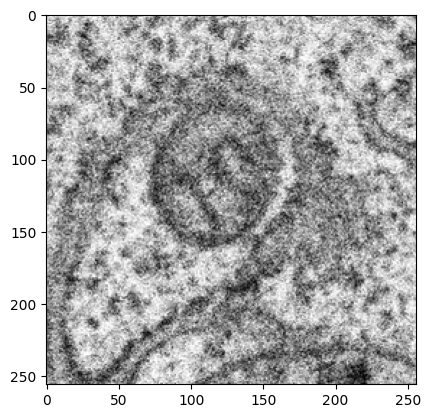

In [14]:
from IPython.display import display, Math
display(Math("\mathtt{Original~slice}:"))
imgplot = plt.imshow(vol[15], cmap="gray")

<IPython.core.display.Math object>

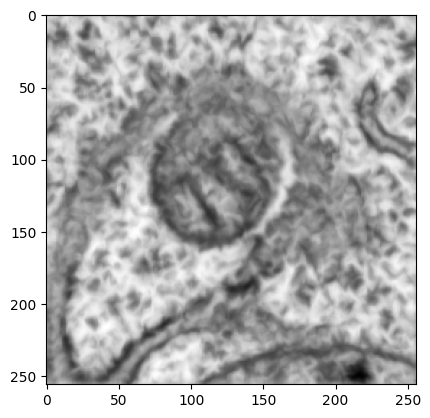

In [15]:
display(Math("\mathtt{Denoised~slice~using~OF~}(\sigma=2):"))
imgplot = plt.imshow(denoised_vol[15], cmap="gray")

<IPython.core.display.Math object>

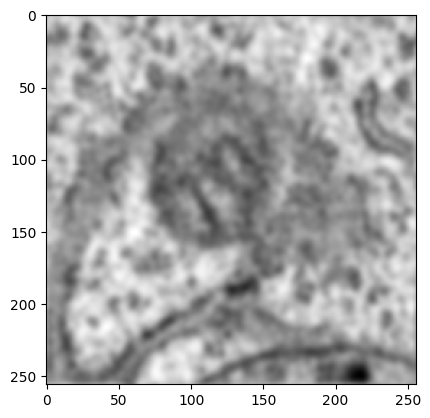

In [16]:
display(Math("\mathtt{Denoised~slice~using~standard~Gaussian~filtering~}(\sigma=2):"))
imgplot = plt.imshow(no_OF_denoised_vol[15], cmap="gray")

## 2. Controlling the length of the filters with the $\sigma$ parameters

### Example for $\sigma_\text{Z}=1.0, \sigma_\text{Y}=2.0~\text{and}~\sigma_\text{X}=0.1$
If $0<\sigma\le 0.1$, then no filtering is performed in the corresponding direction.

In [17]:
%%time
!python ../flowdenoising_6.py -i small_vol.mrc -o denoised_small_vol.mrc -s 1.0 2.0 0.1 -v 1 2>&1 | grep length

[2023-02-15 17:40:49,422] (INFO) length of each filter (Z, Y, X) = [9, 17, 1]
[2023-02-15 17:40:49,428] (INFO) Filtering along Z with l=0, w=5, and kernel length=9
[2023-02-15 17:40:49,764] (INFO) Filtering along Y with l=0, w=5, and kernel length=17
[2023-02-15 17:40:50,200] (INFO) Filtering along X with l=0, w=5, and kernel length=1
CPU times: user 10.7 ms, sys: 12.2 ms, total: 22.9 ms
Wall time: 1.32 s


<IPython.core.display.Math object>

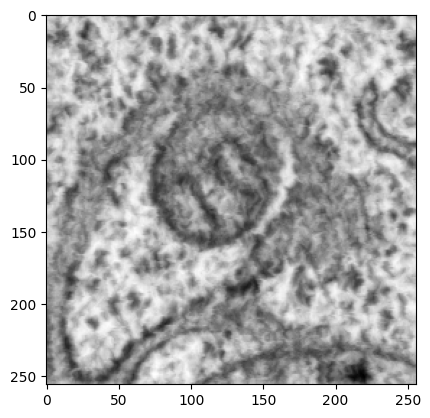

In [18]:
denoised_vol_MRC = mrcfile.open("denoised_small_vol.mrc")
denoised_vol = denoised_vol_MRC.data
display(Math("\mathtt{Denoised~slice~using~OF~}(\sigma_{\mathrm{Z}}=1.0, \sigma_{\mathrm{Y}}=2.0~\mathrm{and}~\sigma_{\mathrm{X}}=0.1):"))
imgplot = plt.imshow(denoised_vol[15], cmap="gray")

## 3. Controlling the search area with the `l` parameter

In [19]:
%%time
!python ../flowdenoising_6.py -i small_vol.mrc -o denoised_small_vol_l0.mrc -l 0 -v 1 2>&1 | grep "l="

[2023-02-15 17:40:50,939] (INFO) Filtering along Z with l=0, w=5, and kernel length=17
[2023-02-15 17:40:51,569] (INFO) Filtering along Y with l=0, w=5, and kernel length=17
[2023-02-15 17:40:52,052] (INFO) Filtering along X with l=0, w=5, and kernel length=17
CPU times: user 12.8 ms, sys: 15.8 ms, total: 28.6 ms
Wall time: 2.13 s


In [20]:
%%time
!python ../flowdenoising_6.py -i small_vol.mrc -o denoised_small_vol_l3.mrc -l 3 -v 1 2>&1 | grep "l="

[2023-02-15 17:40:53,090] (INFO) Filtering along Z with l=3, w=5, and kernel length=17
[2023-02-15 17:40:53,853] (INFO) Filtering along Y with l=3, w=5, and kernel length=17
[2023-02-15 17:40:54,316] (INFO) Filtering along X with l=3, w=5, and kernel length=17
CPU times: user 20.1 ms, sys: 13.8 ms, total: 33.8 ms
Wall time: 2.23 s


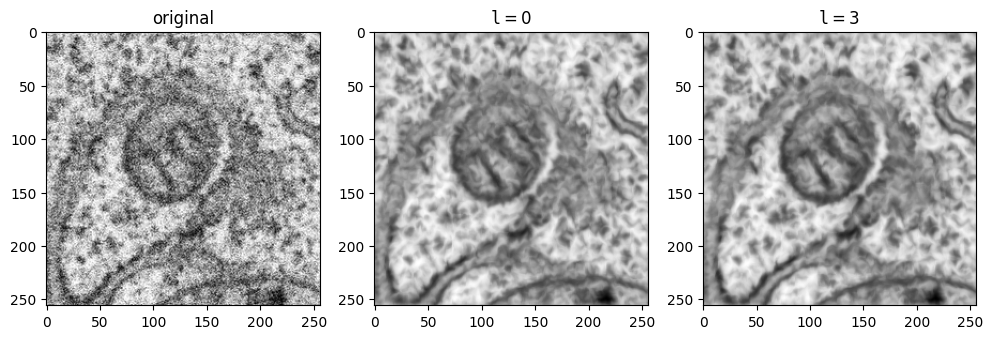

In [21]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
denoised_vol_MRC = mrcfile.open("denoised_small_vol_l0.mrc")
denoised_vol_l0 = denoised_vol_MRC.data
plt.subplot(1, 3, 1)
plt.title("original")
imgplot = plt.imshow(vol[15], cmap="gray")
plt.subplot(1, 3, 2)
plt.title(r"$\mathtt{l}=0$")
imgplot = plt.imshow(denoised_vol_l0[15], cmap="gray")
denoised_vol_MRC = mrcfile.open("denoised_small_vol_l3.mrc")
denoised_vol_l3 = denoised_vol_MRC.data
plt.subplot(1, 3, 3)
plt.title(r"$\mathtt{l}=3$")
imgplot = plt.imshow(denoised_vol_l3[15], cmap="gray")

## 4. Controlling the noise sensitivity with the `w` parameter

In [22]:
%%time
!python ../flowdenoising_6.py -i small_vol.mrc -o denoised_small_vol_w3.mrc -w 3 -v 1 2>&1 | grep "w="

[2023-02-15 17:40:55,773] (INFO) Filtering along Z with l=0, w=3, and kernel length=17
[2023-02-15 17:40:56,363] (INFO) Filtering along Y with l=0, w=3, and kernel length=17
[2023-02-15 17:40:56,838] (INFO) Filtering along X with l=0, w=3, and kernel length=17
CPU times: user 17.8 ms, sys: 9.08 ms, total: 26.9 ms
Wall time: 2.08 s


In [23]:
%%time
!python ../flowdenoising_6.py -i small_vol.mrc -o denoised_small_vol_w17.mrc -w 17 -v 1 2>&1 | grep "w="

[2023-02-15 17:40:57,925] (INFO) Filtering along Z with l=0, w=17, and kernel length=17
[2023-02-15 17:40:58,533] (INFO) Filtering along Y with l=0, w=17, and kernel length=17
[2023-02-15 17:40:59,050] (INFO) Filtering along X with l=0, w=17, and kernel length=17
CPU times: user 27.6 ms, sys: 6.72 ms, total: 34.3 ms
Wall time: 2.21 s


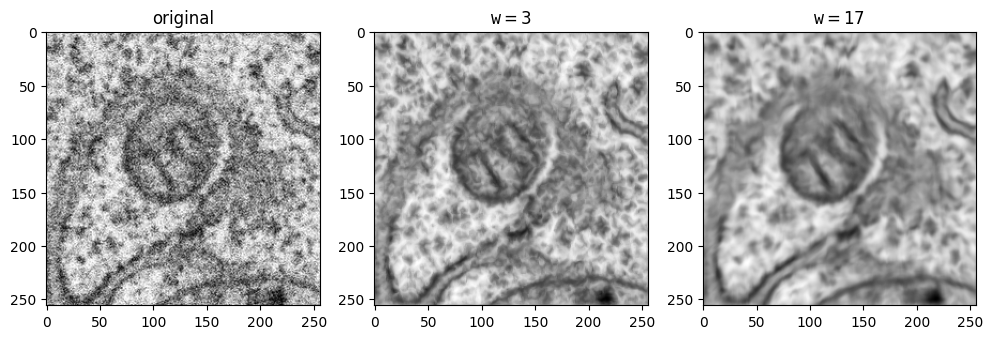

In [24]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
denoised_vol_MRC = mrcfile.open("denoised_small_vol_w3.mrc")
denoised_vol_w3 = denoised_vol_MRC.data
plt.subplot(1, 3, 1)
plt.title("original")
imgplot = plt.imshow(vol[15], cmap="gray")
plt.subplot(1, 3, 2)
plt.title(r"$\mathtt{w}=3$")
imgplot = plt.imshow(denoised_vol_w3[15], cmap="gray")
denoised_vol_MRC = mrcfile.open("denoised_small_vol_w17.mrc")
denoised_vol_w17 = denoised_vol_MRC.data
plt.subplot(1, 3, 3)
plt.title(r"$\mathtt{w}=17$")
imgplot = plt.imshow(denoised_vol_w17[15], cmap="gray")

## 4. Using a ("big") volume

In [25]:
%%bash
OUTPUT_FILENAME="big_vol.mrc"
if test ! -f $OUTPUT_FILENAME ; then
    FILEID="1lSFb4VZ5iqR3kLdPv1dDbdOe9dKPZ--_"
    wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O $OUTPUT_FILENAME && rm -rf /tmp/cookies.txt 2> /dev/null
fi

In [26]:
vol_MRC = mrcfile.open("big_vol.mrc")
vol = vol_MRC.data
print("(Z_size, Y_size, X_size) =", vol.shape)

(Z_size, Y_size, X_size) = (100, 1024, 1024)


In [27]:
%%time
!python ../flowdenoising_5.py -i big_vol.mrc -o denoised_big_vol.mrc -v 1 -l 0

[2023-02-15 17:41:00,464] (INFO) Verbosity level = 1
[2023-02-15 17:41:00,464] (INFO) 0 %
[2023-02-15 17:41:00,464] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-02-15 17:41:00,464] (INFO) reading "big_vol.mrc"
[2023-02-15 17:41:00,561] (INFO) shape of the input volume (Z, Y, X) = (100, 1024, 1024)
[2023-02-15 17:41:00,561] (INFO) type of the volume = float32
[2023-02-15 17:41:00,561] (INFO) vol requires 400.0 MB
[2023-02-15 17:41:00,581] (INFO) big_vol.mrc max = 255.0
[2023-02-15 17:41:00,600] (INFO) big_vol.mrc min = 0.0
[2023-02-15 17:41:00,626] (INFO) Input vol average = 164.70201110839844
[2023-02-15 17:41:00,626] (INFO) read "big_vol.mrc" in 0.16197214299999985 seconds
[2023-02-15 17:41:00,626] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 17:41:00,627] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 17:41:00,627] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 17:41:00,627] (INFO) length of each filter (Z, Y, X) = [17, 17, 17]
[2023-02-15 17:41:00,869]

In [28]:
%%time
!python ../flowdenoising_6.py -i big_vol.mrc -o denoised_big_vol.mrc -v 1 -l 0

[2023-02-15 17:42:32,782] (INFO) Verbosity level = 1
[2023-02-15 17:42:32,782] (INFO) Number of processing units: 20
[2023-02-15 17:42:32,782] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-02-15 17:42:32,782] (INFO) reading "big_vol.mrc"
[2023-02-15 17:42:32,880] (INFO) shape of the input volume (Z, Y, X) = (100, 1024, 1024)
[2023-02-15 17:42:32,880] (INFO) type of the volume = float32
[2023-02-15 17:42:32,880] (INFO) vol requires 400.0 MB
[2023-02-15 17:42:32,902] (INFO) big_vol.mrc max = 255.0
[2023-02-15 17:42:32,922] (INFO) big_vol.mrc min = 0.0
[2023-02-15 17:42:32,947] (INFO) Input vol average = 164.70201110839844
[2023-02-15 17:42:32,948] (INFO) read "big_vol.mrc" in 0.16522779899999973 seconds
[2023-02-15 17:42:32,948] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 17:42:32,948] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 17:42:32,948] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 17:42:32,948] (INFO) length of each filter (Z, Y, X) = [17, 17, 17

In [29]:
%%time
!python ../flowdenoising_6.py -i big_vol.mrc -o no_OF_denoised_big_vol.mrc --no_OF 

CPU times: user 104 ms, sys: 30.7 ms, total: 134 ms
Wall time: 6.62 s


In [30]:
denoised_vol_MRC = mrcfile.open("denoised_big_vol.mrc")
denoised_vol = denoised_vol_MRC.data
no_OF_denoised_vol_MRC = mrcfile.open("no_OF_denoised_big_vol.mrc")
no_OF_denoised_vol = no_OF_denoised_vol_MRC.data

<IPython.core.display.Math object>

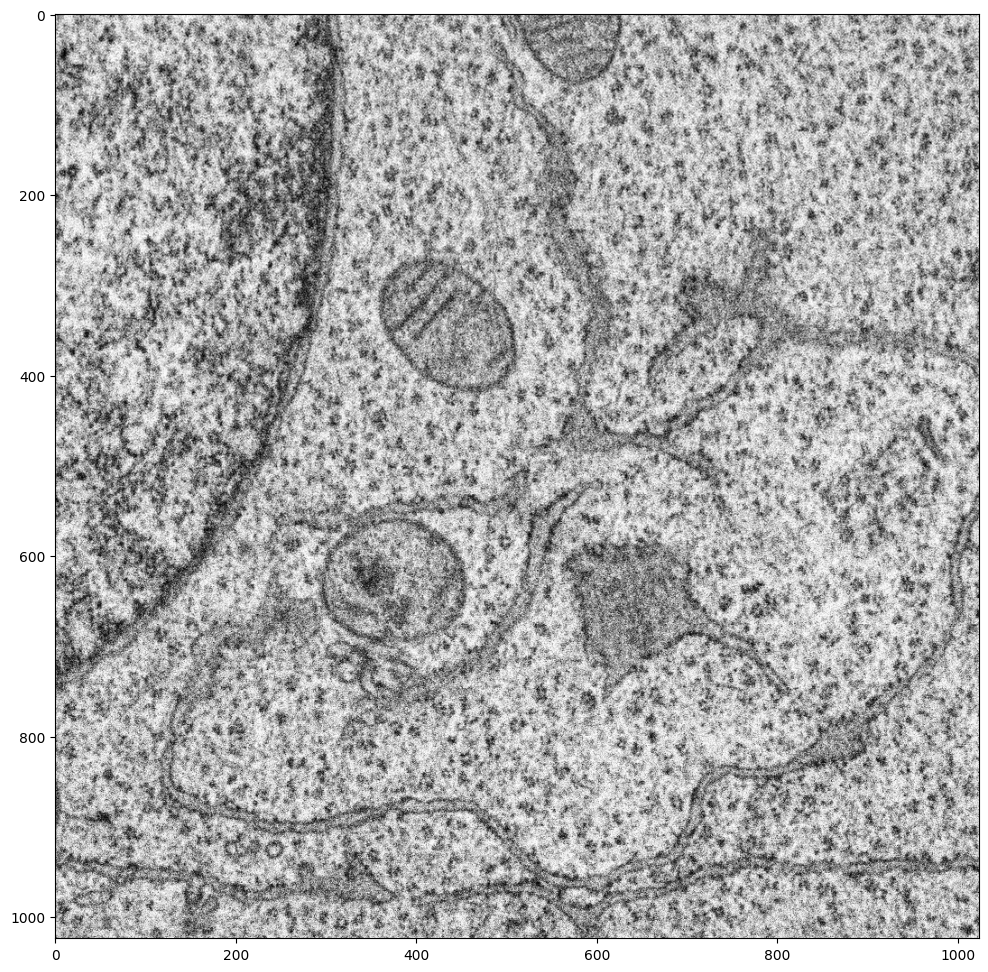

In [31]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
display(Math("\mathtt{Original~slice}:"))
imgplot = plt.imshow(vol[vol.shape[0]//2], cmap="gray")

<IPython.core.display.Math object>

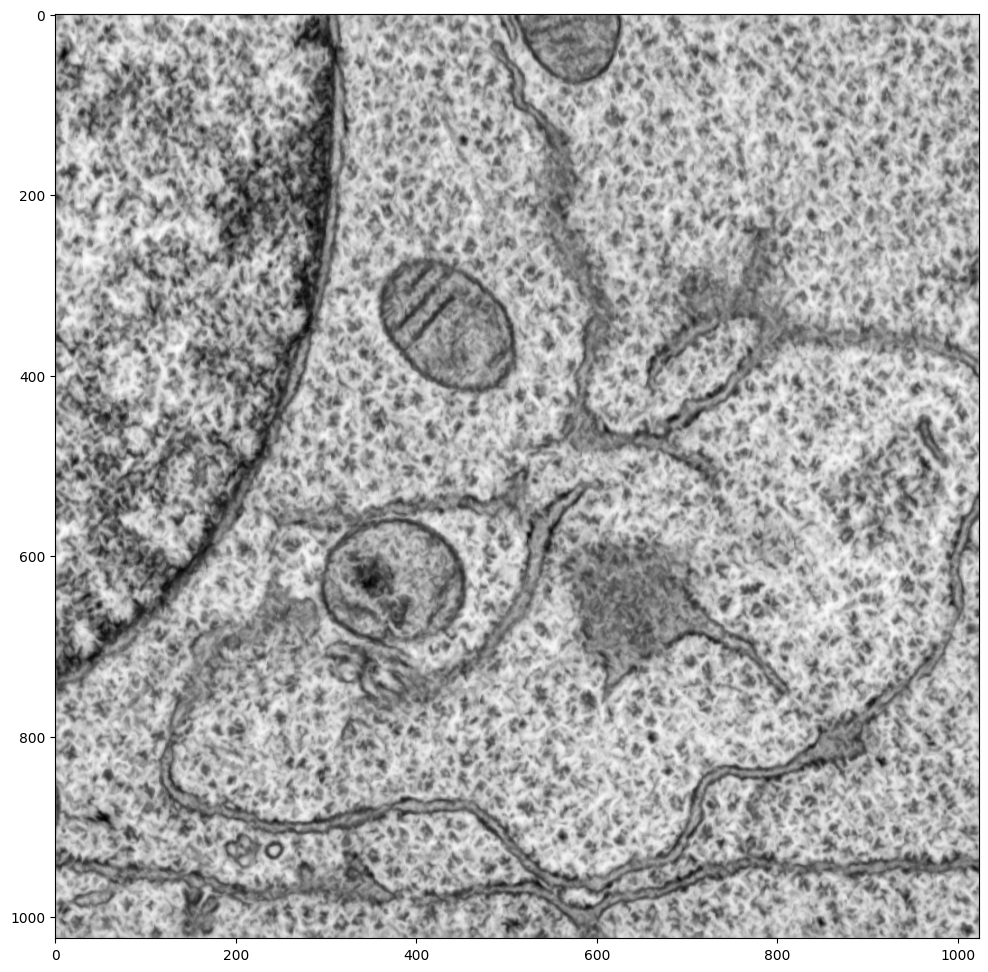

In [32]:
display(Math("\mathtt{Denoised~slice~using~OF}~(\sigma=2):"))
figure(figsize=(12, 12))
imgplot = plt.imshow(denoised_vol[vol.shape[0]//2], cmap="gray")

<IPython.core.display.Math object>

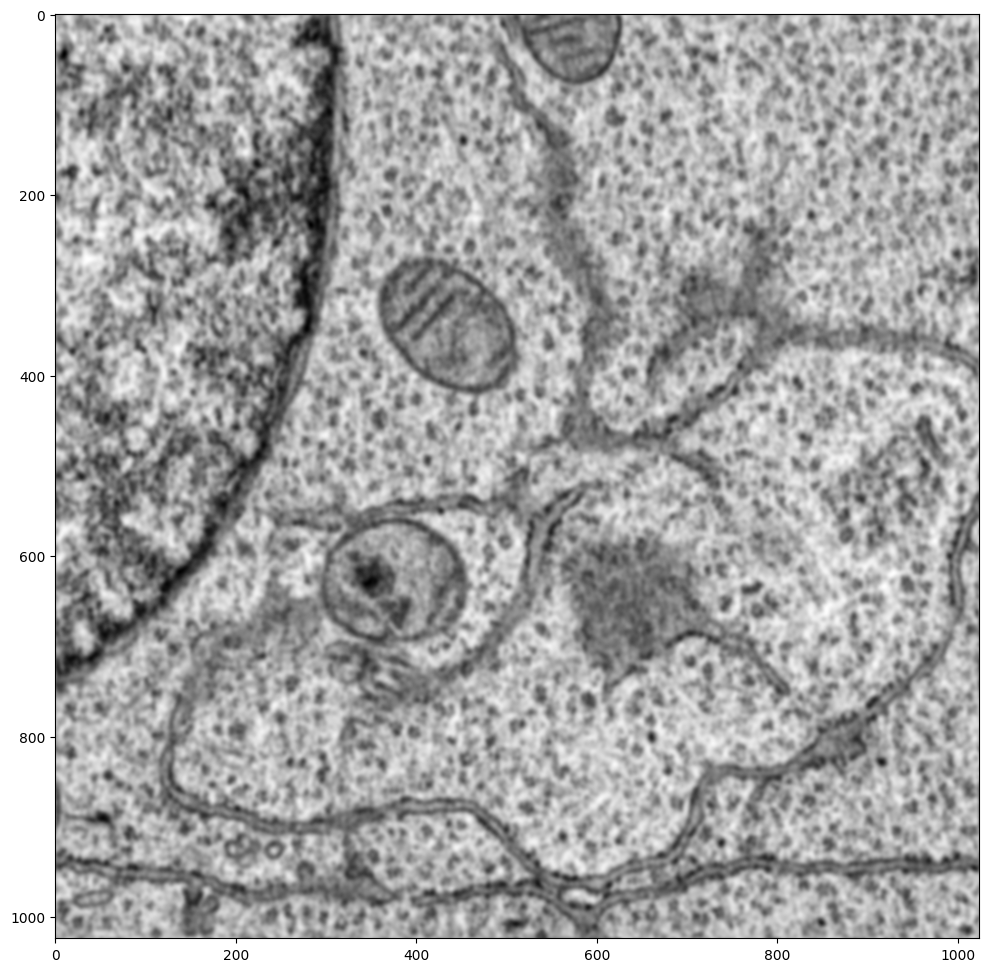

In [33]:
display(Math("\mathtt{Denoised~slice~using~standard~Gaussian~filtering}~(\sigma=2):"))
figure(figsize=(12, 12))
imgplot = plt.imshow(no_OF_denoised_vol[vol.shape[0]//2], cmap="gray")

In [36]:
%%time
!python ../flowdenoising_6.py -i big_vol.mrc -o denoised_big_vol.mrc -v 1 -l 0 -p 1

[2023-02-15 17:47:44,139] (INFO) Verbosity level = 1
[2023-02-15 17:47:44,139] (INFO) Number of processing units: 20
[2023-02-15 17:47:44,139] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-02-15 17:47:44,139] (INFO) reading "big_vol.mrc"
[2023-02-15 17:47:44,230] (INFO) shape of the input volume (Z, Y, X) = (100, 1024, 1024)
[2023-02-15 17:47:44,230] (INFO) type of the volume = float32
[2023-02-15 17:47:44,230] (INFO) vol requires 400.0 MB
[2023-02-15 17:47:44,249] (INFO) big_vol.mrc max = 255.0
[2023-02-15 17:47:44,268] (INFO) big_vol.mrc min = 0.0
[2023-02-15 17:47:44,293] (INFO) Input vol average = 164.70201110839844
[2023-02-15 17:47:44,293] (INFO) read "big_vol.mrc" in 0.15390139700000027 seconds
[2023-02-15 17:47:44,293] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 17:47:44,294] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 17:47:44,294] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-15 17:47:44,294] (INFO) length of each filter (Z, Y, X) = [17, 17, 17

[2023-02-15 17:50:41,750] (INFO) 4.19 %
[2023-02-15 17:50:42,751] (INFO) 4.24 %
[2023-02-15 17:50:43,753] (INFO) 4.24 %
[2023-02-15 17:50:44,753] (INFO) 4.28 %
[2023-02-15 17:50:45,755] (INFO) 4.28 %
[2023-02-15 17:50:46,756] (INFO) 4.33 %
[2023-02-15 17:50:47,757] (INFO) 4.33 %
[2023-02-15 17:50:48,759] (INFO) 4.38 %
[2023-02-15 17:50:49,760] (INFO) 4.38 %
[2023-02-15 17:50:50,761] (INFO) 4.42 %
[2023-02-15 17:50:51,762] (INFO) 4.42 %
[2023-02-15 17:50:52,764] (INFO) 4.47 %
[2023-02-15 17:50:53,765] (INFO) 4.47 %
[2023-02-15 17:50:54,766] (INFO) 4.52 %
[2023-02-15 17:50:55,768] (INFO) 4.52 %
[2023-02-15 17:50:56,769] (INFO) 4.56 %
[2023-02-15 17:50:57,770] (INFO) 4.56 %
[2023-02-15 17:50:58,771] (INFO) 4.61 %
[2023-02-15 17:50:59,773] (INFO) 4.61 %
[2023-02-15 17:51:00,040] (INFO) Filtering along Y with l=0, w=5, and kernel length=17
[2023-02-15 17:51:00,774] (INFO) 4.80 %
[2023-02-15 17:51:01,775] (INFO) 5.07 %
[2023-02-15 17:51:02,777] (INFO) 5.31 %
[2023-02-15 17:51:03,778] (INFO) 

[2023-02-15 17:54:00,985] (INFO) 49.72 %
[2023-02-15 17:54:01,987] (INFO) 49.95 %
[2023-02-15 17:54:02,988] (INFO) 50.19 %
[2023-02-15 17:54:03,989] (INFO) 50.47 %
[2023-02-15 17:54:04,990] (INFO) 50.70 %
[2023-02-15 17:54:05,991] (INFO) 50.93 %
[2023-02-15 17:54:06,992] (INFO) 51.21 %
[2023-02-15 17:54:07,994] (INFO) 51.44 %
[2023-02-15 17:54:08,995] (INFO) 51.68 %
[2023-02-15 17:54:09,996] (INFO) 51.96 %
[2023-02-15 17:54:10,997] (INFO) 52.19 %
[2023-02-15 17:54:11,511] (INFO) Filtering along X with l=0, w=5, and kernel length=17
[2023-02-15 17:54:11,999] (INFO) 52.37 %
[2023-02-15 17:54:13,000] (INFO) 52.56 %
[2023-02-15 17:54:14,001] (INFO) 52.75 %
[2023-02-15 17:54:15,003] (INFO) 52.98 %
[2023-02-15 17:54:16,003] (INFO) 53.17 %
[2023-02-15 17:54:17,005] (INFO) 53.35 %
[2023-02-15 17:54:18,006] (INFO) 53.54 %
[2023-02-15 17:54:19,007] (INFO) 53.72 %
[2023-02-15 17:54:20,008] (INFO) 53.96 %
[2023-02-15 17:54:21,010] (INFO) 54.14 %
[2023-02-15 17:54:22,010] (INFO) 54.33 %
[2023-02-15

[2023-02-15 17:57:19,221] (INFO) 88.69 %
[2023-02-15 17:57:20,222] (INFO) 88.87 %
[2023-02-15 17:57:21,224] (INFO) 89.11 %
[2023-02-15 17:57:22,225] (INFO) 89.29 %
[2023-02-15 17:57:23,226] (INFO) 89.48 %
[2023-02-15 17:57:24,227] (INFO) 89.66 %
[2023-02-15 17:57:25,229] (INFO) 89.85 %
[2023-02-15 17:57:26,230] (INFO) 90.08 %
[2023-02-15 17:57:27,231] (INFO) 90.27 %
[2023-02-15 17:57:28,232] (INFO) 90.46 %
[2023-02-15 17:57:29,234] (INFO) 90.64 %
[2023-02-15 17:57:30,235] (INFO) 90.83 %
[2023-02-15 17:57:31,236] (INFO) 91.01 %
[2023-02-15 17:57:32,237] (INFO) 91.25 %
[2023-02-15 17:57:33,238] (INFO) 91.43 %
[2023-02-15 17:57:34,240] (INFO) 91.62 %
[2023-02-15 17:57:35,241] (INFO) 91.81 %
[2023-02-15 17:57:36,242] (INFO) 91.99 %
[2023-02-15 17:57:37,243] (INFO) 92.18 %
[2023-02-15 17:57:38,245] (INFO) 92.41 %
[2023-02-15 17:57:39,246] (INFO) 92.60 %
[2023-02-15 17:57:40,247] (INFO) 92.78 %
[2023-02-15 17:57:41,248] (INFO) 92.97 %
[2023-02-15 17:57:42,250] (INFO) 93.16 %
[2023-02-15 17:5